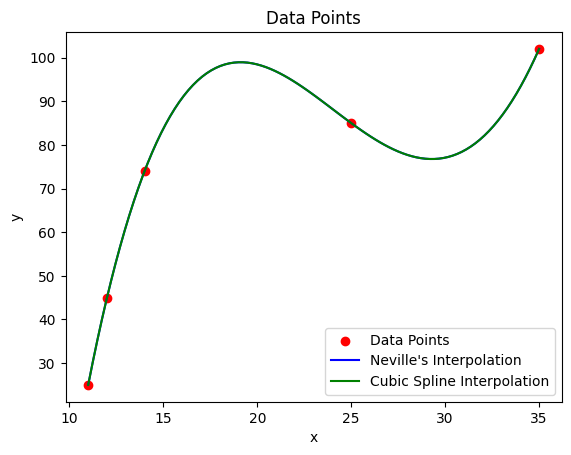

Neville's Interpolation at x = 41.0: 204.3129479216436
Neville's Interpolation at x = 18.0: 98.03712374581939


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Manual implementation of Neville's method
def neville(x, y, x_interpolate):
 n = len(x)
 Q = np.zeros((n, n))
 for i in range(n):
  Q[i, 0] = y[i]

 for i in range(1, n):
  for j in range(1, i + 1):
   Q[i, j] = ((x_interpolate - x[i - j]) * Q[i, j - 1] - (x_interpolate - x[i]) * Q[i - 1, j - 1]) / (x[i] - x[i - j])
 return Q[n - 1, n - 1]
# Manual implementation of cubic spline interpolation
def cubic_spline_interpolation(x, y, x_interpolate):
 n = len(x)
 a = y.copy()
 h = [x[i] - x[i - 1] for i in range(1, n)]
 alpha = [(3 / h[i]) * (a[i + 1] - a[i]) - (3 / h[i - 1]) * (a[i] - a[i - 1]) for i in range(1, n - 1)]
 l = [1] * (n - 1)
 mu = [0] * (n - 1)
 z = [0] * (n - 1)
 for i in range(1, n - 1):
  l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
  mu[i] = h[i] / l[i]
  z[i] = (alpha[i - 1] - h[i - 1] * z[i - 1]) / l[i]
 l = [0] * n
 c = [0] * n
 b = [0] * (n - 1)
 d = [0] * (n - 1)
 l[n - 1] = 1
 c[n - 1] = 0
 for j in range(n - 2, -1, -1):
  c[j] = z[j] - mu[j] * c[j + 1]
  b[j] = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
  d[j] = (c[j + 1] - c[j]) / (3 * h[j])
 # Find the interval to interpolate in
 for i in range(n - 1):
  if x_interpolate >= x[i] and x_interpolate <= x[i + 1]:
   interval = i
   break
 # Compute the interpolated value
 dx = x_interpolate - x[interval]
 interpolated_value = a[interval] + b[interval] * dx + c[interval] * dx ** 2 + d[interval] * dx ** 3
 return interpolated_value

def main():
 x = []
 y = []
 n = int(input("Enter the number of data points: "))
 for i in range(n):
  x_val = float(input(f"Enter x value {i + 1}: "))
  y_val = float(input(f"Enter y value {i + 1}: "))
  x.append(x_val)
  y.append(y_val)
 x.sort() # Sort x values in ascending order
 x_interpolate = float(input("Enter the x-coordinate to interpolate: "))
 method_choice = input("Choose interpolation method ('neville' or 'spline'): ")
 if method_choice == 'neville':
  interpolated_value = neville(x, y, x_interpolate)
 elif method_choice == 'spline':
  interpolated_value = cubic_spline_interpolation(x, y, x_interpolate)
 else:
  print("Invalid method choice. Please select 'neville' or 'spline'.")
  return
 # Plot the data points
 plt.scatter(x, y, label='Data Points', color='red')
 plt.xlabel('x')
 plt.ylabel('y')
 plt.title("Data Points")
 if method_choice == 'neville':
  x_curve = np.linspace(min(x), max(x), 100)
  y_curve = [neville(x, y, x_interpolate) for x_interpolate in x_curve]
  plt.plot(x_curve, y_curve, label="Neville's Interpolation", color='blue')
 elif method_choice == 'spline':
  x_curve = np.linspace(min(x), max(x), 100)
  y_curve = [cubic_spline_interpolation(x, y, x_interpolate) for x_interpolate in x_curve]
 
 plt.plot(x_curve, y_curve, label="Cubic Spline Interpolation", color='green')
 plt.legend()
 plt.show()
 print(f"{method_choice.capitalize()}'s Interpolation at x = {x_interpolate}: {interpolated_value}")
 # Ask the user to evaluate 'y' for a given 'x' value using the selected method
 x_eval = float(input(f"Enter the value of 'x' for which you want to evaluate 'y' using {method_choice.capitalize()}'s method: "))
 if min(x) <= x_eval <= max(x):
  if method_choice == 'neville':
   y_eval = neville(x, y, x_eval)
   print(f"{method_choice.capitalize()}'s Interpolation at x = {x_eval}: {y_eval}")
  elif method_choice == 'spline':
   y_eval = cubic_spline_interpolation(x, y, x_eval)
   print(f"{method_choice.capitalize()}'s Interpolation at x = {x_eval}: {y_eval}")
  else:
   print("Invalid 'x' value. Must be within the range of provided data points.")

if __name__ == "__main__":
 main()